# 3. Preparation & preprocessing

## 3.1. Duplicates

**We can't drop duplicates because this dataset is meant to have duplicates.**

## 3.2 Splitting dataset

**The 2 types of rows (score_change and dart_throw) contain very different information so let's split them up in 2 datasets**

In [151]:
throws = darts[darts['type'] == 'single_throw_dart']
score_changes = darts[darts['type'] == 'score_change_dart']

## 3.3 missing values

**Let's check for missing values on the throws dataset first**

In [152]:
throws.isna().sum().divide(len(throws)).round(4)*100

day                  0.0
type                 0.0
points               0.0
segment              0.0
event_points         0.0
double_attempt       0.0
team                 0.0
leg_points_home    100.0
leg_pints_away     100.0
leg_score_home     100.0
leg_score_away     100.0
set_score_home     100.0
set_score_away     100.0
dtype: float64

**Great, no missing values for the first columns. This is because I already handled them in my datascrape code.**

**The last columns however have 100% missing values, this is normal because these columns are for the score_change dataset. We can delete these columns.**

In [153]:
throws = throws[['day', 'type', 'points', 'segment', 'event_points', 'double_attempt', 'team']]

**for the score_change dataset:**

In [155]:
score_changes.isna().sum().divide(len(score_changes)).round(4)*100

day                  0.0
type                 0.0
points             100.0
segment            100.0
event_points       100.0
double_attempt     100.0
team                 0.0
leg_points_home      0.0
leg_pints_away       0.0
leg_score_home       0.0
leg_score_away       0.0
set_score_home       0.0
set_score_away       0.0
dtype: float64

**Also no missing values, except for the columns that are not necessary. Let's remove these as well**

In [156]:
score_changes = score_changes[['day', 'type', 'leg_points_home', 'leg_pints_away', 'leg_score_home', 'leg_score_away', 'set_score_home', 'set_score_away']]

## 3.4. Anomalies and outliers

**A simple yet effective way to check for anomalies is to use a boxplot to visuale the data. Boxplots for some possible outlier sensitive columns are listed here:**

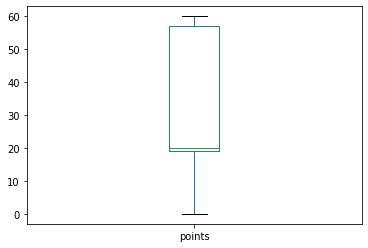

In [160]:
throws['points'].plot(kind='box');

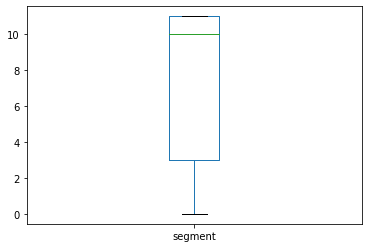

In [161]:
throws['segment'].plot(kind='box');

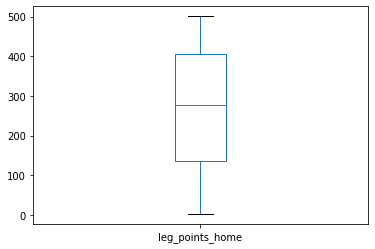

In [163]:
score_changes['leg_points_home'].plot(kind='box');

**Looks good. Let's start exploring the data.**